In [13]:
# from google.colab import drive
# drive.mount('/content/drive')
from IPython.display import display
from PIL import Image

### Regression analysis
is used to quantify the relationship between two variables.

For example, say there's a relationship between house size and the price. In this case, the size of the house is the explanatory (independant) variable while the price is the dependent variable (as it depends on the size of the house).

Two kinds of regression:
1. Simple Regression
    - Only uses one independent variable (house size in our example) for predicting the other
    - Assumes a linear relationship exists between the two variables
    - Uses the form: y = a + bx (alpha plus beta times x)
    - Finds the line of best fit by finding the line with the least errors
        - errors are the differences between the actual data points and the predictions given by the line of best fit
2. Multivariate Regression
    - Contains multiple independent variables that work together to predict the dependent variable

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from scipy import stats

In [15]:
housing_data = pd.read_excel('PythonForFinanceCourseMaterials/S13 - Part II Finance - Regressions for Fin. Analysis/Housing.xlsx')
housing_data

,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction
0,1116000,1940,IN,8,2002
1,860000,1300,IN,5,1992
2,818400,1420,IN,6,1987
3,1000000,1680,IN,7,2000
4,640000,1270,IN,5,1995
5,1010000,1850,IN,7,1998
6,600000,1000,IN,4,2015
7,700000,1100,LA,4,2014
8,1100000,1600,LA,7,2017
9,570000,1000,NY,5,1997


In [16]:
housing_data[['House Price', 'House Size (sq.ft.)']]

,House Price,House Size (sq.ft.)
0,1116000,1940
1,860000,1300
2,818400,1420
3,1000000,1680
4,640000,1270
5,1010000,1850
6,600000,1000
7,700000,1100
8,1100000,1600
9,570000,1000


### Univariate Regression

In [17]:
X = housing_data['House Size (sq.ft.)'] # Independent variable
Y = housing_data['House Price'] # Dependent variable

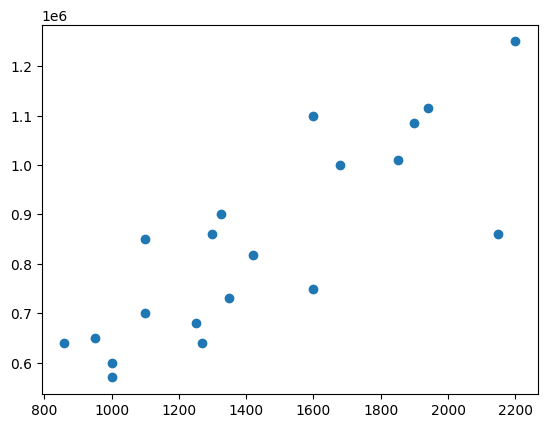

In [18]:
plt.scatter(X, Y)

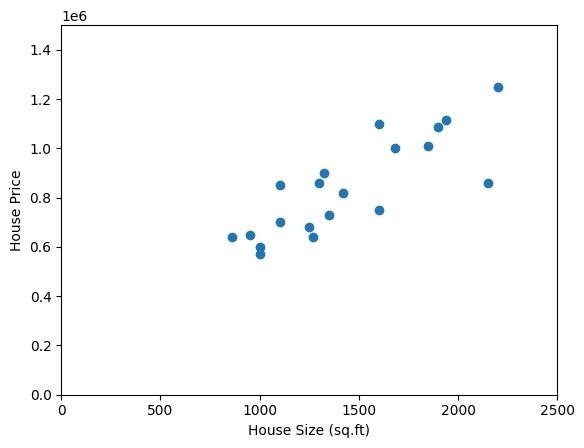

In [19]:
# If you want to scale the graph to the data:
plt.scatter(X, Y)
plt.axis([0, 2500, 0, 1500000])
plt.ylabel('House Price')
plt.xlabel('House Size (sq.ft)')
plt.show()

### How to distinguish Good Regressions:
Usually, more than one variable determines house prices. Things like:
- Location
- Neighborhood
- Year of Construction
- Etc

So when simple regressions are used, they often omit certain factors which will result in an estimation error (a larger distance between prediction model the actual data). This doesn't make simple predictions useless, as they still may have high predictive power, just noting that they're imperfect. So really, regression models can be written as:
- Y = a + bx + error (Y equals alpha plus beta x plus error)
People often use the word 'residuals' to refer to the error, or distances from the data to the model.

The way the line of best fit becomes the best fitting line is by minimizing the SSR aka the sum of squared residuals (ie. Sum(error<sup>2</sup>))

Thus, the coefficients found with this technique (the beta in y = a + bx + error) are called OLS estimates (Ordinary least square estimates).

When considering if all regressions are good, follow your intuition. Some variables are better predictors than others. For instance, the age of the owner is probably a worse predictor than house size for the price of a house. Enter the R<sup>2</sup> metric:
- To consider R<sup>2</sup>, we begin with TSS or Total Sum of Squares
    - Sum(x-mean)<sup>2</sup>
    - It's like the variance/s<sup>2</sup> formula without the denominator
- Then R<sup>2</sup> = 1 - SSR/TSS
- R<sup>2</sup> varies between 0% - 100%. The higher it is, the more predictive power the model has
    - R<sup>2</sup>'s percentage is the predicative accuracy or ability of the model. ie. if the R<sup>2</sup> value = 0.678, that means there's a 67.8% chance of occuring

Sidenote on R<sup>2</sup>:
- R<sup>2</sup> is a measure of how well the model matches the data. NOT how well the model makes predictions. This took a long time to separate in my mind. You can have a model that matches data VERY well while also making terrible predictions (which I believe is often reffered to as over-fitting)

In [20]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit() # Output of an Ordinary Least Squares regression

In [21]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     37.95
Date:                Thu, 18 Sep 2025   Prob (F-statistic):           8.13e-06
Time:                        21:30:26   Log-Likelihood:                -260.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      18   BIC:                             526.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.608e+05   9.76e+04      2.673      0.016    5.58e+04    4.66e+05
House Size (sq.ft.)   401.9163     65.243      6.160      0.000     264.846     538.987
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.715
Skew:                          -0.459   Prob(JB):                        0.699
Kurtosis:                       2.884   Cond. No.                     5.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

When looking at the summary, we get a lot of statistics. Most are recognizable by name. In the second chart from summary, we can see the coef column and const row. This value represents alpha (a) in the Y = a + bx + error formula (which is the same as the y-intercept/b in y=mx+b). The value down a row (House Size sq.ft) in the coef column is the beta value in Y=a+bx+error (slope/m in y=mx+b). The std err of the House Size row is the error in Y=a+bx+error.

So:
- Alpha is the y-intercept
- Beta is the slope of the regression line
- std err is the average amount of error using a line with alpha as the y-intercept and beta as the slope will give you

In [22]:
# You can also use scipy's linregress function to get the same statistics
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

print(slope)
print(intercept)
print(r_value)
print(str(r_value ** 2))
print(p_value)
print(std_err)

401.91628631922595
260806.2360560964
0.8235775534696924
0.678279986579124
8.129642377231308e-06
65.24299510636492
